IMPORT LIB

In [1106]:
import pandas as  pd    
import seaborn as sns
import numpy as np
import plotly.express as px 
import openpyxl
import matplotlib.pyplot as plt

IMPORT DATA

In [1107]:
df_survey=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/employee_survey_data.csv')
df_general=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/general_data.csv')
df_in_time=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/in_time.csv')
df_manager_survey=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/manager_survey_data.csv')
df_out_time=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/out_time.csv')
dictionary = pd.read_excel('/Users/kalou/Documents/GitHub/rh-analysis/archive/data_dictionary.xlsx')


EXPLO DATA

In [1108]:
df_manager_survey

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
...,...,...,...
4405,4406,3,3
4406,4407,2,3
4407,4408,3,4
4408,4409,2,3


In [1109]:
df_manager_survey.isnull().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

DF SURVEY

In [1110]:
df_survey.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [1111]:
df_survey.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [1112]:
df_survey_clean=df_survey.dropna()

DF GENERAL

In [1113]:
df_general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [1114]:
df_general_survey = pd.merge(df_general, df_survey, on='EmployeeID', how='outer')


In [1115]:
df_general_final = pd.merge(df_general_survey, df_manager_survey, on='EmployeeID', how='outer')


In [1116]:
df_general_final.shape

(4410, 29)

In [1117]:
df_general_final.dropna(subset=['EnvironmentSatisfaction','JobSatisfaction' ,'WorkLifeBalance'])

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,6.0,2,6,1,5,3.0,4.0,3.0,2,3
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4


In [1118]:
df_general_survey_clean=df_general_final.dropna(subset=['EnvironmentSatisfaction','JobSatisfaction' ,'WorkLifeBalance'])

In [1119]:
filtered_general=df_general[df_general['NumCompaniesWorked'].isnull()] 
filtered_general

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
115,27,No,Travel_Rarely,Sales,2,3,Life Sciences,1,116,Male,...,NaN,Y,12,8,1,5.0,2,5,0,4
210,52,No,Travel_Rarely,Sales,2,1,Medical,1,211,Male,...,NaN,Y,11,8,1,18.0,2,10,6,9
343,40,No,Travel_Frequently,Sales,9,3,Marketing,1,344,Male,...,NaN,Y,14,8,0,10.0,3,1,0,0
476,22,No,Travel_Rarely,Research & Development,8,3,Other,1,477,Male,...,NaN,Y,21,8,1,4.0,2,4,1,1
647,29,No,Travel_Rarely,Research & Development,3,3,Technical Degree,1,648,Female,...,NaN,Y,16,8,1,9.0,2,7,1,7
799,29,Yes,Travel_Frequently,Research & Development,28,3,Medical,1,800,Female,...,NaN,Y,17,8,3,7.0,1,5,0,0
932,32,No,Travel_Rarely,Research & Development,5,4,Technical Degree,1,933,Male,...,NaN,Y,13,8,0,10.0,5,9,1,6
1103,26,No,Travel_Frequently,Sales,16,2,Life Sciences,1,1104,Male,...,NaN,Y,14,8,0,8.0,3,7,7,7
1312,37,Yes,Travel_Rarely,Human Resources,9,3,Human Resources,1,1313,Male,...,NaN,Y,17,8,0,7.0,4,3,0,2
1521,31,No,Travel_Rarely,Research & Development,20,1,Technical Degree,1,1522,Female,...,NaN,Y,13,8,1,6.0,3,5,0,3


In [1167]:
df_general_explo = df_general_survey_clean.drop(columns=['NumCompaniesWorked','Gender', 'Over18', 'EmployeeCount', 'StandardHours'])

In [1173]:
df_general_explo['MonthlyIncome']

0       131160
1        41890
2       193280
3        83210
4        23420
         ...  
4404     35390
4405     60290
4406     26790
4407     37020
4408     23980
Name: MonthlyIncome, Length: 4327, dtype: int64

In [1168]:
df_general_explo.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeID                   int64
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
dtype: object

In [1182]:
Salary=df_general_explo.groupby('JobRole')['MonthlyIncome'].mean()
Salary


JobRole
Healthcare Representative    61026.089239
Human Resources              58896.688312
Laboratory Technician        66698.500000
Manager                      62559.533333
Manufacturing Director       69379.906542
Research Director            65351.848739
Research Scientist           65093.070684
Sales Executive              65041.220021
Sales Representative         64768.852459
Name: MonthlyIncome, dtype: float64

WHY DOES R&D HAVE THE HIGHEST ATTRITION PERCENTAGE BY DEPARTMENT

In [1122]:
attrition_percentage = df_general_explo[df_general_explo['Attrition'] == 'Yes'].groupby('Department').size() / len(df_general_explo) * 100

percentage_df = pd.DataFrame({'Department': attrition_percentage.index, 'Attrition Percentage': attrition_percentage.values})

fig = px.bar(percentage_df, x='Attrition Percentage', y='Department', orientation='h', title='Attrition Percentage by Department', labels={'x':'Attrition Percentage', 'y':'Department'})
fig.show()

In [1123]:
df_R_D=df_general_explo[df_general_explo['Department']=='Research & Development']
df_R_D

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,1,Research Scientist,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,4,Sales Executive,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,3,Human Resources,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,1,Sales Executive,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,6,4,Research Director,...,28.0,5,7,7,7,3.0,2.0,2.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400,37,No,Travel_Rarely,Research & Development,22,5,Medical,4401,2,Manufacturing Director,...,17.0,3,3,0,2,3.0,1.0,2.0,3,3
4403,39,No,Travel_Frequently,Research & Development,22,3,Medical,4404,1,Manufacturing Director,...,20.0,2,19,11,8,3.0,3.0,3.0,3,3
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,1,Research Scientist,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,1,Laboratory Technician,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3


In [1228]:
df_R_D.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeID                   int64
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
dtype: object

In [1236]:
px.histogram(df_R_D, x='DistanceFromHome', y='Attrition', histfunc='avg')

WHY DOES MEDICAL AND LIFE SCIENCES EDUCATION FIELD HAVE THE HIGHEST EDUCATION FIELD PERCENTAGE OF ATTRITION?

In [1225]:


attrition_percentage = df_general_explo[df_general_explo['Attrition'] == 'Yes'].groupby('EducationField').size() / len(df_general_explo) * 100

percentage_df = pd.DataFrame({'EducationField': attrition_percentage.index, 'Attrition Percentage': attrition_percentage.values})

fig = px.bar(percentage_df, x='Attrition Percentage', y='EducationField', orientation='h', title='Attrition Percentage by Education Field', labels={'x':'Attrition Percentage', 'y':'Education Field'})
fig.show()


NOT IMPORTANT

In [1126]:


attrition_percentage = df_general_explo[df_general_explo['Attrition'] == 'Yes'].groupby('BusinessTravel').size() / len(df_general_explo) * 100

percentage_df = pd.DataFrame({'BusinessTravel': attrition_percentage.index, 'Attrition Percentage': attrition_percentage.values})

fig = px.bar(percentage_df, x='Attrition Percentage', y='BusinessTravel', orientation='h', title='Attrition Percentage by BusinessTravel', labels={'x':'Attrition Percentage', 'y':'Business Travel'})
fig.show()

WHY DOES  SALES EX, RESEARCH SCIENTIST AND LARORATORY TECH HAVE THE HIGHEST JOBROLE ATTRITION PERCENTAGE?

In [1226]:

attrition_percentage = df_general_explo[df_general_explo['Attrition'] == 'Yes'].groupby('JobRole').size() / len(df_general_explo) * 100

percentage_df = pd.DataFrame({'JobRole': attrition_percentage.index, 'Attrition Percentage': attrition_percentage.values})

fig = px.bar(percentage_df, x='Attrition Percentage', y='JobRole', orientation='h', title='Attrition Percentage by JobRole', labels={'x':'Attrition Percentage', 'y':'JobRole'})
fig.show()

In [1227]:

attrition_percentage = df_general_explo[df_general_explo['Attrition'] == 'Yes'].groupby('MaritalStatus').size() / len(df_general_explo) * 100

percentage_df = pd.DataFrame({'MaritalStatus': attrition_percentage.index, 'Attrition Percentage': attrition_percentage.values})

fig = px.bar(percentage_df, x='Attrition Percentage', y='MaritalStatus', orientation='h', title='Attrition Percentage by MaritalStatus', labels={'x':'Attrition Percentage', 'y':'MaritalStatus'})
fig.show()

In [1129]:
nb_attrition =df_general_explo['Attrition'].value_counts()

DF IN TIME

In [1130]:
df_in_time.isnull().sum()


Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64

In [1131]:
df_in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [1132]:
df_null=df_in_time.columns[df_in_time.isna().all()]
df_null

Index(['2015-01-01', '2015-01-14', '2015-01-26', '2015-03-05', '2015-05-01',
       '2015-07-17', '2015-09-17', '2015-10-02', '2015-11-09', '2015-11-10',
       '2015-11-11', '2015-12-25'],
      dtype='object')

In [1133]:
df_in_time.drop(columns=['2015-01-01', '2015-01-14', '2015-01-26', '2015-03-05', '2015-05-01',
       '2015-07-17', '2015-09-17', '2015-10-02', '2015-11-09', '2015-11-10',
       '2015-11-11', '2015-12-25', 'Unnamed: 0'], inplace=True)

In [1134]:
df_in_time = df_in_time.apply(pd.to_datetime)


In [1135]:
df_in_time.fillna(pd.to_datetime('1900-01-01 00:00:00'), inplace=True)


In [1136]:
df_in_time.dtypes

2015-01-02    datetime64[ns]
2015-01-05    datetime64[ns]
2015-01-06    datetime64[ns]
2015-01-07    datetime64[ns]
2015-01-08    datetime64[ns]
                   ...      
2015-12-24    datetime64[ns]
2015-12-28    datetime64[ns]
2015-12-29    datetime64[ns]
2015-12-30    datetime64[ns]
2015-12-31    datetime64[ns]
Length: 249, dtype: object

DF OUT TIME

In [1137]:
df_out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [1138]:
df_null2=df_out_time.columns[df_out_time.isna().all()]
df_null2

Index(['2015-01-01', '2015-01-14', '2015-01-26', '2015-03-05', '2015-05-01',
       '2015-07-17', '2015-09-17', '2015-10-02', '2015-11-09', '2015-11-10',
       '2015-11-11', '2015-12-25'],
      dtype='object')

In [1139]:
df_out_time.drop(columns=['2015-01-01', '2015-01-14', '2015-01-26', '2015-03-05', '2015-05-01',
       '2015-07-17', '2015-09-17', '2015-10-02', '2015-11-09', '2015-11-10',
       '2015-11-11', '2015-12-25', 'Unnamed: 0'], inplace=True)

In [1140]:
df_out_time = df_out_time.apply(pd.to_datetime)


In [1141]:
df_in_time.fillna(pd.to_datetime('1900-01-01 00:00:00'), inplace=True)


In [1142]:
df_out_time


,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,2015-01-15 17:22:13,2015-01-16 17:35:11,...,NaT,NaT,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2015-01-02 18:22:17,2015-01-05 17:48:22,NaT,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,2015-01-15 17:14:44,2015-01-16 17:40:57,...,2015-12-17 17:10:50,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaT,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,2015-01-15 17:21:29,2015-01-16 17:18:13,...,2015-12-17 17:06:23,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,2015-01-15 16:53:26,2015-01-16 16:52:34,...,2015-12-17 17:21:57,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,2015-01-15 18:21:48,2015-01-16 18:28:03,...,2015-12-17 18:05:47,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,2015-01-02 17:27:37,2015-01-05 19:08:20,2015-01-06 18:50:49,2015-01-07 18:57:40,2015-01-08 17:58:31,2015-01-09 18:06:15,2015-01-12 17:58:48,2015-01-13 18:10:35,2015-01-15 17:50:37,2015-01-16 18:50:04,...,2015-12-17 18:35:39,2015-12-18 18:06:05,2015-12-21 18:35:06,2015-12-22 18:33:44,2015-12-23 18:40:56,2015-12-24 18:21:29,2015-12-28 18:44:35,2015-12-29 19:14:38,2015-12-30 18:24:56,2015-12-31 18:30:41
4406,2015-01-02 16:19:01,NaT,2015-01-06 15:07:37,2015-01-07 15:25:50,2015-01-08 16:12:33,2015-01-09 15:26:56,2015-01-12 16:10:42,2015-01-13 16:22:43,2015-01-15 16:19:00,2015-01-16 15:30:38,...,2015-12-17 15:44:50,2015-12-18 15:23:02,2015-12-21 15:31:14,2015-12-22 15:45:59,2015-12-23 16:38:59,2015-12-24 15:47:15,2015-12-28 15:34:34,2015-12-29 16:47:02,2015-12-30 16:03:17,2015-12-31 16:18:39
4407,2015-01-02 17:17:35,2015-01-05 17:08:07,2015-01-06 17:27:46,2015-01-07 18:27:22,2015-01-08 17:05:25,2015-01-09 17:02:57,2015-01-12 17:35:45,2015-01-13 17:15:52,2015-01-15 18:15:53,2015-01-16 18:00:37,...,2015-12-17 17:42:43,2015-12-18 17:48:05,2015-12-21 17:43:05,2015-12-22 17:47:23,2015-12-23 17:43:37,2015-12-24 17:20:12,2015-12-28 17:43:28,NaT,2015-12-30 17:48:14,2015-12-31 18:08:55
4408,2015-01-02 19:48:37,2015-01-05 19:37:40,2015-01-06 20:00:08,2015-01-07 19:35:59,2015-01-08 18:55:13,NaT,2015-01-12 19:18:17,2015-01-13 19:24:02,2015-01-15 18:33:21,2015-01-16 19:24:36,...,2015-12-17 19:06:58,2015-12-18 19:52:44,2015-12-21 19:21:35,2015-12-22 19:32:40,2015-12-23 18:57:00,2015-12-24 19:37:57,2015-12-28 19:58:36,2015-12-29 18:55:26,2015-12-30 19:37:22,2015-12-31 19:33:45


In [1143]:
result = df_out_time - df_in_time
result

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,...,NaT,NaT,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,0 days 08:06:33,0 days 07:27:17,NaT,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,...,0 days 07:55:42,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,NaT,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,...,0 days 07:13:06,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,0 days 06:54:28,...,0 days 07:27:21,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
4,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,0 days 08:24:13,...,0 days 08:19:12,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0 days 08:07:05,0 days 08:50:27,0 days 08:23:58,0 days 08:50:42,0 days 08:13:25,0 days 08:16:51,0 days 08:21:38,0 days 08:45:33,0 days 08:21:20,0 days 09:00:27,...,0 days 08:30:17,0 days 08:04:59,0 days 08:09:41,0 days 08:17:33,0 days 08:36:16,0 days 08:35:49,0 days 08:28:56,0 days 09:04:29,0 days 08:56:37,0 days 08:30:29
4406,0 days 06:15:20,NaT,0 days 05:23:37,0 days 05:43:40,0 days 06:11:36,0 days 05:42:52,0 days 06:03:10,0 days 06:17:32,0 days 06:00:49,0 days 05:35:33,...,0 days 05:59:01,0 days 05:55:30,0 days 05:49:50,0 days 05:55:29,0 days 06:06:38,0 days 05:59:34,0 days 05:40:11,0 days 06:33:30,0 days 05:42:08,0 days 06:08:51
4407,0 days 07:16:34,0 days 07:35:07,0 days 07:38:29,0 days 07:59:10,0 days 07:17:47,0 days 07:01:54,0 days 07:46:33,0 days 07:28:42,0 days 08:07:22,0 days 07:41:57,...,0 days 07:41:07,0 days 07:47:08,0 days 07:51:58,0 days 07:45:13,0 days 07:45:08,0 days 07:24:07,0 days 07:44:04,NaT,0 days 07:45:38,0 days 08:05:25
4408,0 days 09:31:32,0 days 09:35:13,0 days 09:47:18,0 days 09:23:28,0 days 09:12:16,NaT,0 days 09:17:39,0 days 09:35:59,0 days 09:29:04,0 days 09:20:21,...,0 days 09:15:18,0 days 09:58:11,0 days 09:20:27,0 days 09:22:21,0 days 09:14:30,0 days 09:41:52,0 days 10:03:11,0 days 09:00:44,0 days 09:21:38,0 days 09:36:58


In [1144]:
hours=result.mean(axis=1)
hours

0      0 days 07:22:25.142241379
1      0 days 07:43:08.288135593
2      0 days 07:00:47.665289256
3      0 days 07:11:37.242553191
4      0 days 08:00:22.228571428
                  ...           
4405   0 days 08:31:20.197530864
4406   0 days 06:05:34.634854771
4407   0 days 07:42:23.874458874
4408   0 days 09:29:33.340248962
4409   0 days 06:59:20.211206896
Length: 4410, dtype: timedelta64[ns]

In [1145]:
time_only = hours.dt.components['hours'].astype(str) + ':' + hours.dt.components['minutes'].astype(str) + ':' + hours.dt.components['seconds'].astype(str)


In [1146]:
df_general_explo['avg_working_time']=time_only

In [1147]:
df_general_explo.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,avg_working_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Healthcare Representative,...,6,1,0,0,3.0,4.0,2.0,3,3,7:22:25
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,1,Research Scientist,...,3,5,1,4,3.0,2.0,4.0,2,4,7:43:8
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,4,Sales Executive,...,2,5,0,3,2.0,2.0,1.0,3,3,7:0:47
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,3,Human Resources,...,5,8,7,5,4.0,4.0,3.0,2,3,7:11:37
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,1,Sales Executive,...,2,6,0,4,4.0,1.0,3.0,3,3,8:0:22


In [1148]:
import plotly.graph_objects as go


In [1149]:
df_general_explo['avg_working_time'].isnull().sum()

0

In [1150]:
# Drop rows with NaN values in 'avg_working_time' column
#df_general_explo = df_general_explo.dropna(subset=['avg_working_time'])

# Convert 'avg_working_time' to datetime format
#df_general_explo['avg_working_time'] = pd.to_datetime(df_general_explo['avg_working_time'], errors='coerce')

# Extract the hour component
#df_general_explo['avg_working_time_hour'] = df_general_explo['avg_working_time'].dt.hour

In [1151]:
df_general_explo.drop(columns='EmployeeID', inplace=True)


In [1152]:
df_general_explo

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MaritalStatus,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,avg_working_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,Married,...,6,1,0,0,3.0,4.0,2.0,3,3,7:22:25
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,Single,...,3,5,1,4,3.0,2.0,4.0,2,4,7:43:8
2,32,No,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,Married,...,2,5,0,3,2.0,2.0,1.0,3,3,7:0:47
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,Married,...,5,8,7,5,4.0,4.0,3.0,2,3,7:11:37
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,Single,...,2,6,0,4,4.0,1.0,3.0,3,3,8:0:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,2,Human Resources,Single,...,2,6,1,5,3.0,4.0,3.0,2,3,7:17:34
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Research Scientist,Single,...,5,3,0,2,4.0,1.0,3.0,3,3,8:31:20
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Laboratory Technician,Divorced,...,2,3,0,2,4.0,4.0,3.0,2,3,6:5:34
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,2,Sales Executive,Married,...,4,4,1,2,1.0,3.0,3.0,3,4,7:42:23


In [1153]:
px.histogram(df_general_explo, x='JobRole', y='avg_working_time', histfunc='avg')

In [1154]:
avg_job_satisfaction = df_general_explo.groupby('Department')['JobSatisfaction'].mean()
avg_EnvironmentSatisfaction = df_general_explo.groupby('Department')['EnvironmentSatisfaction'].mean()
avg_WorkLifeBalance = df_general_explo.groupby('Department')['WorkLifeBalance'].mean()


In [1155]:
avg_job_satisfaction = df_general_explo.groupby('Department')['JobSatisfaction'].mean()
avg_EnvironmentSatisfaction = df_general_explo.groupby('Department')['EnvironmentSatisfaction'].mean()
avg_WorkLifeBalance = df_general_explo.groupby('Department')['WorkLifeBalance'].mean()


In [1156]:
avg_WorkLifeBalance

Department
Human Resources           2.728723
Research & Development    2.753541
Sales                     2.783270
Name: WorkLifeBalance, dtype: float64

In [1157]:
avg_EnvironmentSatisfaction

Department
Human Resources           2.835106
Research & Development    2.717422
Sales                     2.723954
Name: EnvironmentSatisfaction, dtype: float64

In [1158]:
avg_job_satisfaction

Department
Human Resources           2.680851
Research & Development    2.704674
Sales                     2.774905
Name: JobSatisfaction, dtype: float64

In [1159]:
df_general_explo.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
avg_working_time            object
dtype: object

In [1160]:
numerical_features = df_general_explo.select_dtypes(include='number')


In [1161]:
numerical_features.corr()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
Age,1.000000,0.004038,-0.036293,-0.002553,-0.046365,-0.034825,-0.030797,0.681844,-0.030548,0.314413,0.217410,0.204564,0.008571,-0.000305,-0.024180,0.019008,-0.025690
DistanceFromHome,0.004038,1.000000,-0.007594,-0.035861,-0.018530,0.036777,0.009745,0.004178,-0.007789,0.030769,0.001802,0.019971,0.018003,-0.010282,0.007716,-0.006985,0.036165
Education,-0.036293,-0.007594,1.000000,0.043622,0.005492,-0.043034,-0.000674,-0.009755,0.009832,0.008329,0.025966,0.007149,-0.045592,-0.005037,-0.005097,-0.019821,-0.035468
JobLevel,-0.002553,-0.035861,0.043622,1.000000,0.045665,0.010213,0.003552,-0.036054,-0.033043,-0.064995,-0.059751,-0.055142,-0.023323,-0.019188,-0.024461,-0.013534,-0.002066
MonthlyIncome,-0.046365,-0.018530,0.005492,0.045665,1.000000,0.008337,0.034060,-0.029165,0.044899,0.002913,0.064142,0.026816,-0.004850,0.003660,0.003822,0.028641,0.020848
PercentSalaryHike,-0.034825,0.036777,-0.043034,0.010213,0.008337,1.000000,0.012795,-0.021452,-0.035239,-0.027938,-0.029224,-0.040741,-0.003544,0.035805,-0.040749,-0.003950,0.773872
StockOptionLevel,-0.030797,0.009745,-0.000674,0.003552,0.034060,0.012795,1.000000,0.000115,-0.068245,0.007328,0.019142,0.015888,-0.006106,0.038818,-0.024070,0.008173,-0.037210
TotalWorkingYears,0.681844,0.004178,-0.009755,-0.036054,-0.029165,-0.021452,0.000115,1.000000,-0.041050,0.633143,0.407461,0.463517,-0.002773,-0.014499,-0.000909,0.003549,-0.002562
TrainingTimesLastYear,-0.030548,-0.007789,0.009832,-0.033043,0.044899,-0.035239,-0.068245,-0.041050,1.000000,-0.009028,0.014364,-0.013949,0.018473,-0.023448,-0.015953,-0.015221,-0.020762
YearsAtCompany,0.314413,0.030769,0.008329,-0.064995,0.002913,-0.027938,0.007328,0.633143,-0.009028,1.000000,0.619266,0.768662,0.003418,-0.001292,0.012673,0.009364,-0.008300


In [1162]:
corr=numerical_features.corr()

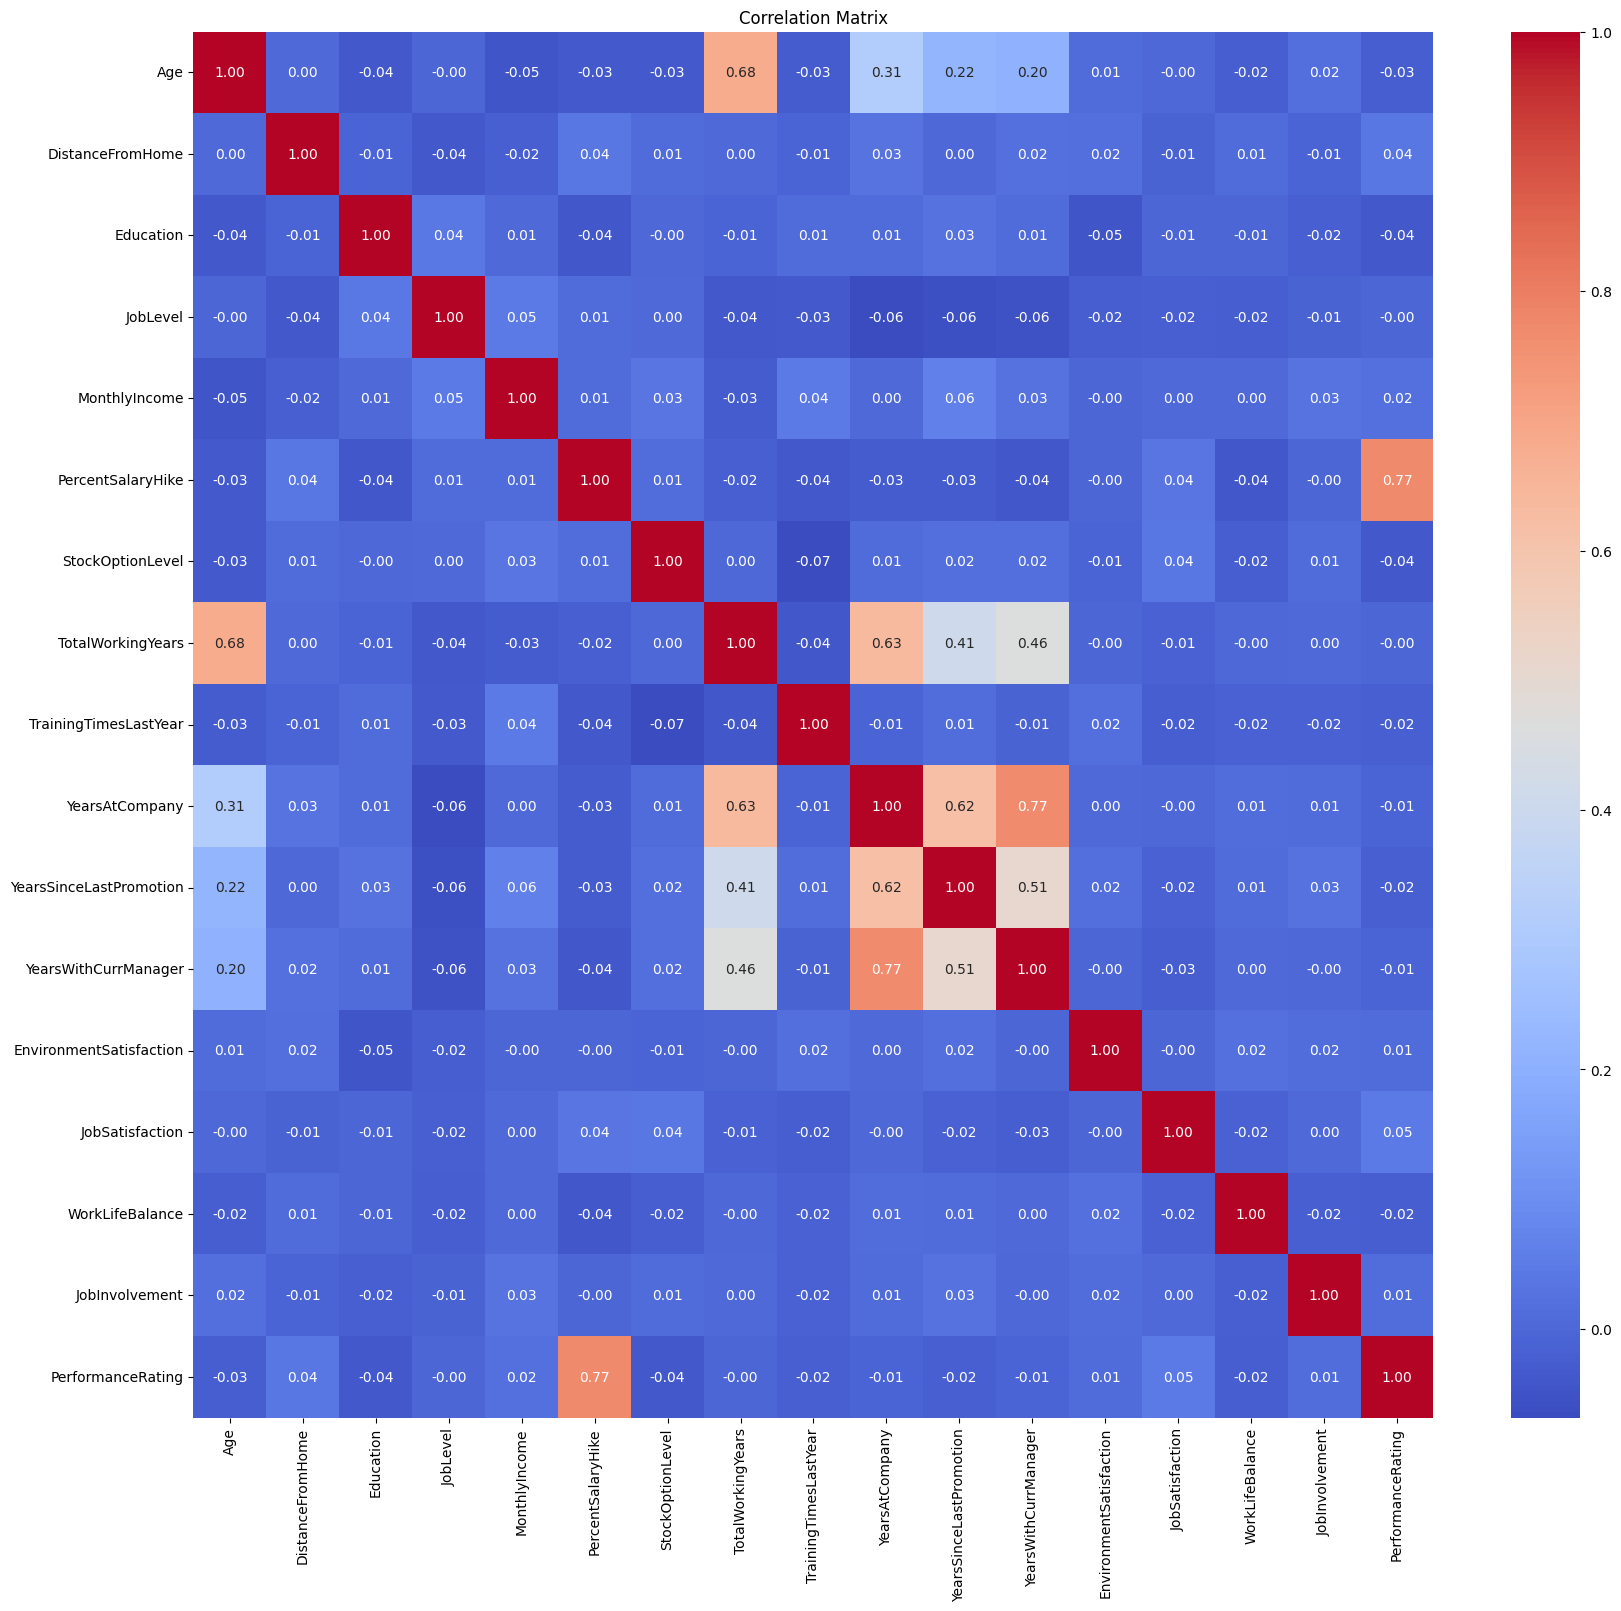

In [1163]:
plt.figure(figsize=(20, 18))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [1208]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
lenc=LabelEncoder()
enc=OneHotEncoder()
scaler=StandardScaler()

In [1209]:
scaled_num=scaler.fit_transform(numerical_features)

In [1183]:
no_numerical_features = df_general_explo.select_dtypes(exclude='number')


In [1223]:
nocorr=no_numerical_features.corr()

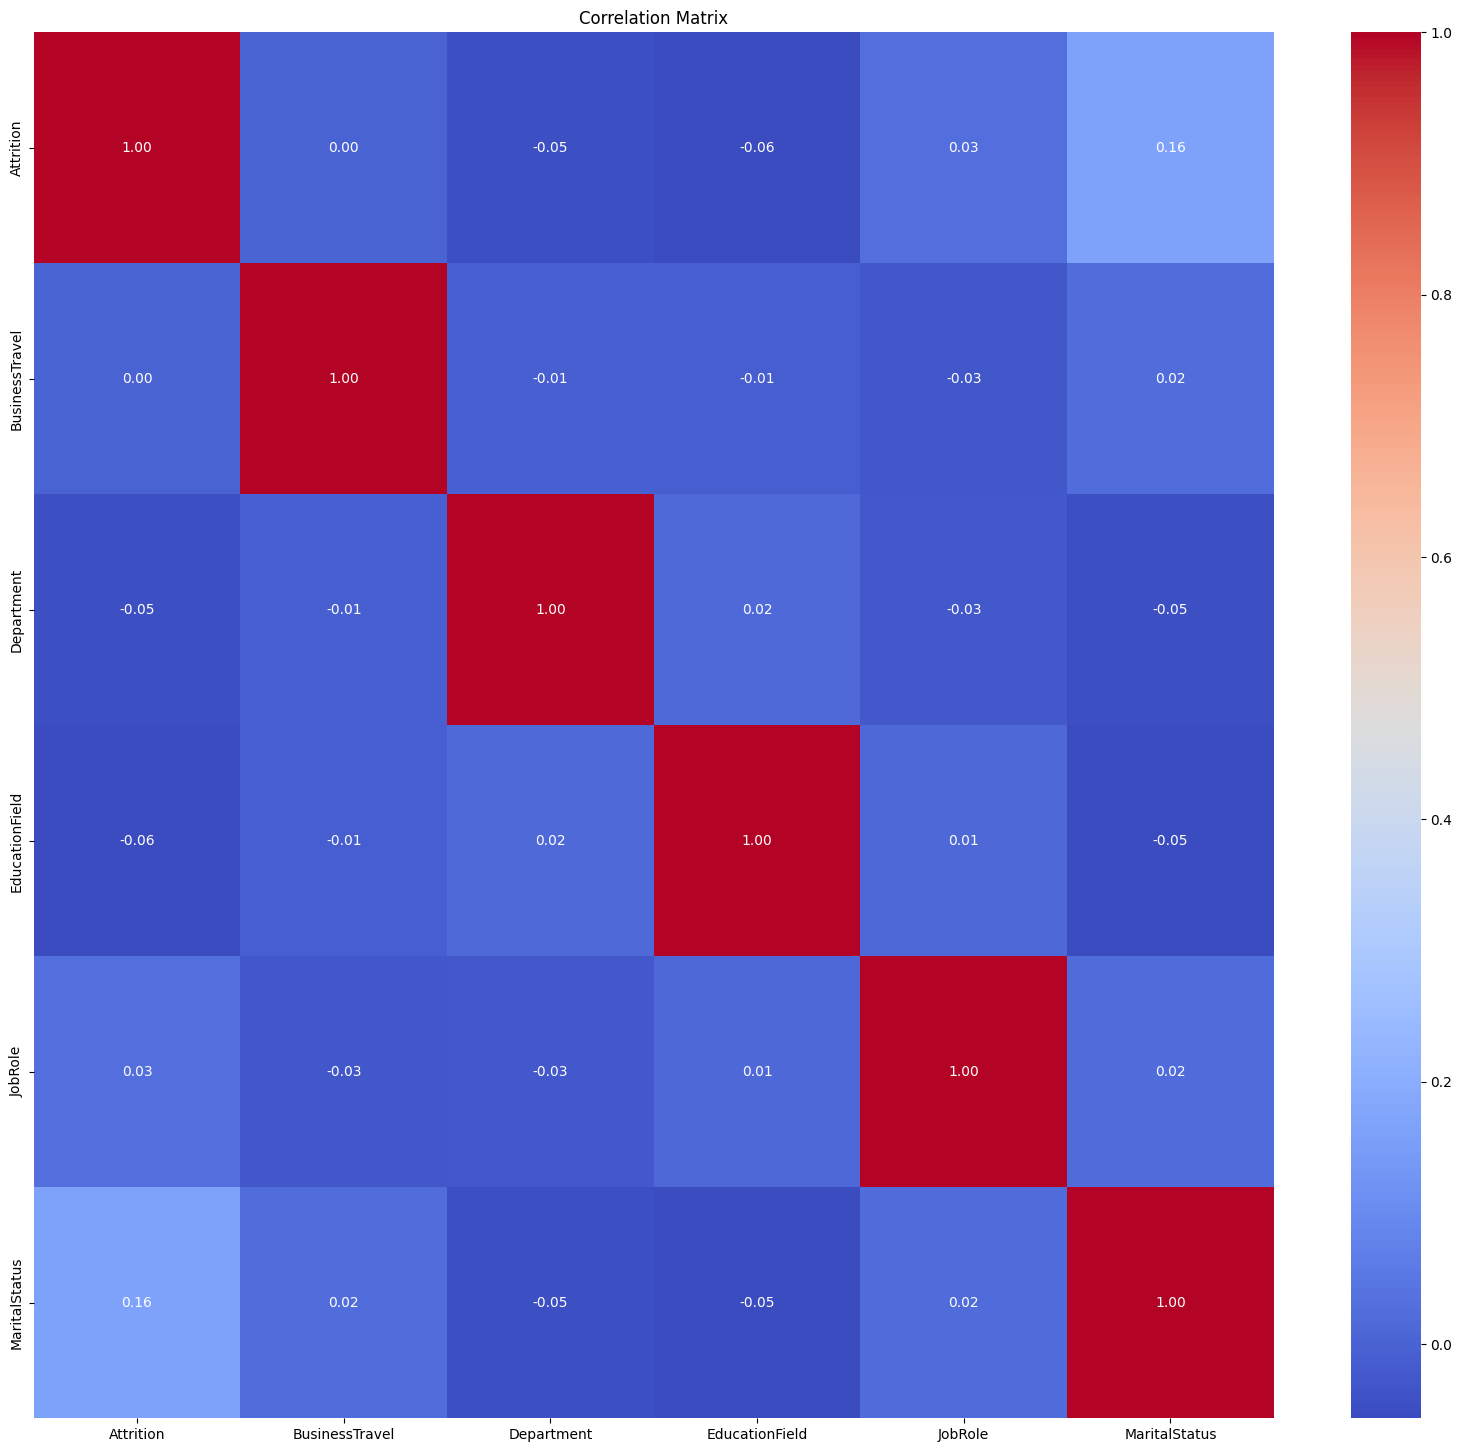

In [1224]:
plt.figure(figsize=(20, 18))
sns.heatmap(nocorr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [1194]:
no_numerical_features

,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus
0,No,Travel_Rarely,Sales,Life Sciences,Healthcare Representative,Married
1,Yes,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Single
2,No,Travel_Frequently,Research & Development,Other,Sales Executive,Married
3,No,Non-Travel,Research & Development,Life Sciences,Human Resources,Married
4,No,Travel_Rarely,Research & Development,Medical,Sales Executive,Single
...,...,...,...,...,...,...
4404,No,Travel_Rarely,Sales,Other,Human Resources,Single
4405,No,Travel_Rarely,Research & Development,Medical,Research Scientist,Single
4406,No,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Divorced
4407,No,Travel_Rarely,Research & Development,Life Sciences,Sales Executive,Married


In [1202]:
no_numerical_features['BusinessTravel']=lenc.fit_transform(no_numerical_features['BusinessTravel'])
no_numerical_features['Department']=lenc.fit_transform(no_numerical_features['Department'])
no_numerical_features['EducationField']=lenc.fit_transform(no_numerical_features['EducationField'])
no_numerical_features['JobRole']=lenc.fit_transform(no_numerical_features['JobRole'])
no_numerical_features['MaritalStatus']=lenc.fit_transform(no_numerical_features['MaritalStatus'])
no_numerical_features['Attrition']=lenc.fit_transform(no_numerical_features['Attrition'])

In [1206]:
no_numerical_features


,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus
0,0,2,2,1,0,1
1,1,1,1,1,6,2
2,0,1,1,4,7,1
3,0,0,1,1,1,1
4,0,2,1,3,7,2
...,...,...,...,...,...,...
4404,0,2,2,4,1,2
4405,0,2,1,3,6,2
4406,0,2,1,3,2,0
4407,0,2,1,1,7,1


In [1216]:
df_scaled=pd.DataFrame(scaled_num, columns=numerical_features.columns)



In [1217]:
final=pd.concat([no_numerical_features,df_scaled], axis=1)

In [1220]:
fcorr=final.corr()

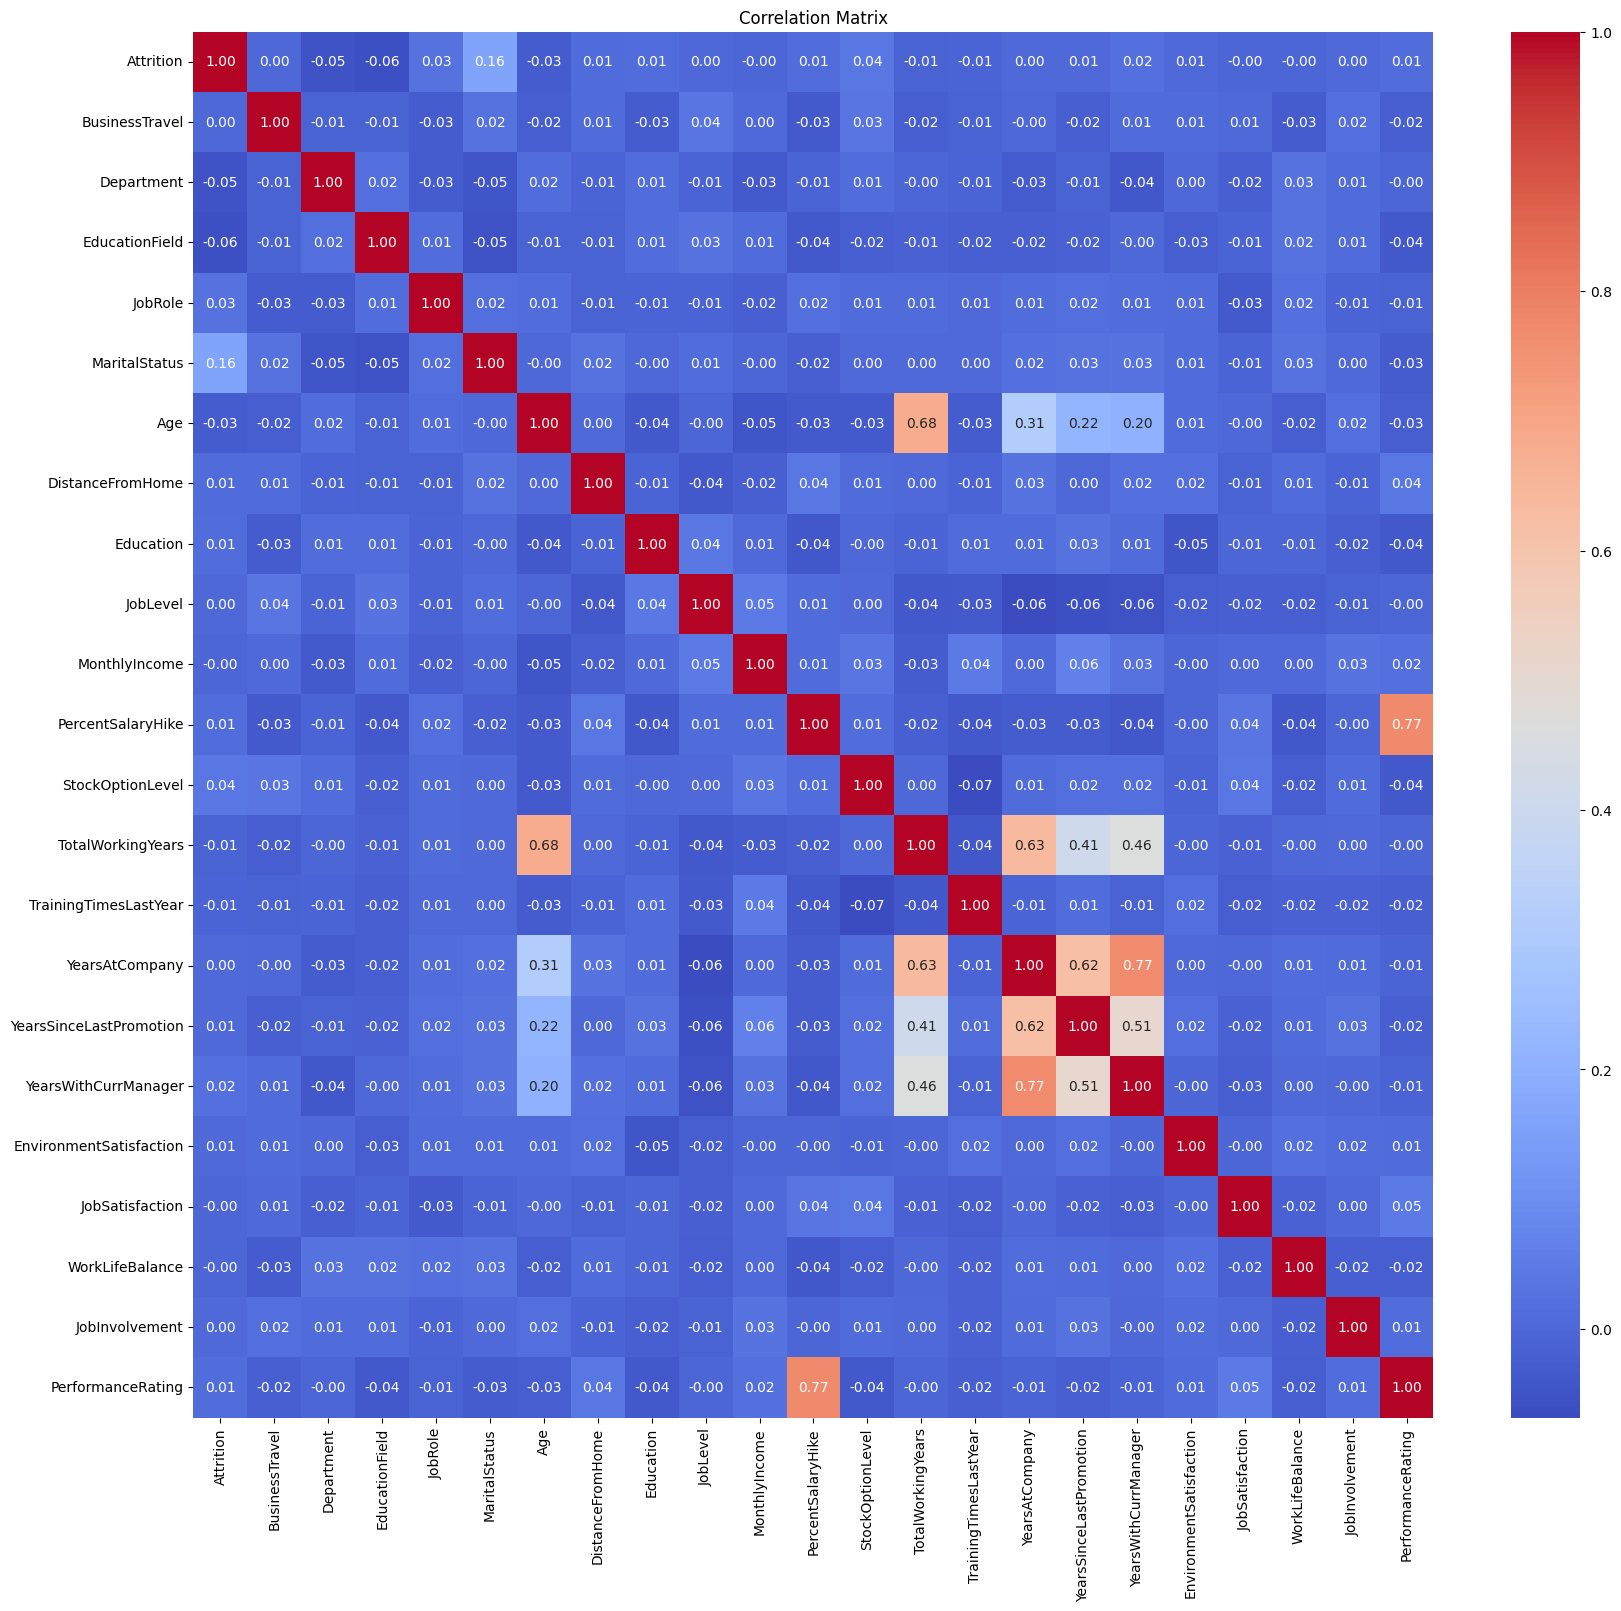

In [1221]:
plt.figure(figsize=(20, 18))
sns.heatmap(fcorr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()